In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error

In [688]:
def change(data):
    if data=="<31":
        return 31
    else :
        return int(data)

Reading datasets from csv files.

In [689]:
montrealBikeLane = pd.read_csv("datasets/MontrealBikeLane.csv")
weatherInfo = pd.read_csv("datasets/WeatherInfo.csv")

Renaming the columns of Date and Date/Time

In [690]:
montrealBikeLane.rename(columns = {'Date':'date_time'}, inplace = True)
weatherInfo.rename(columns = {'Date/Time':'date_time'}, inplace = True)

<Axes: >

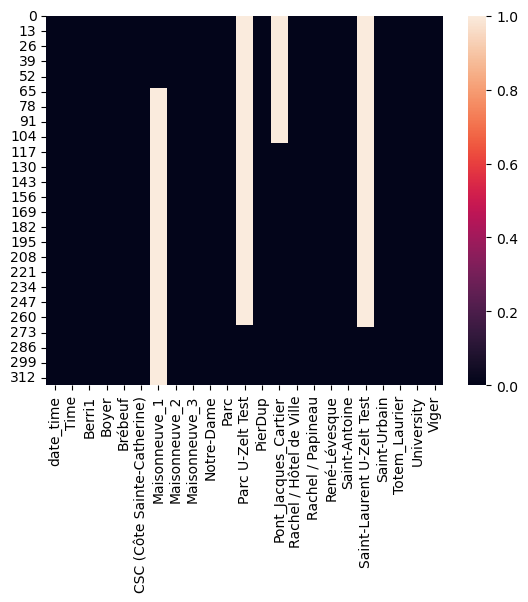

In [691]:
sns.heatmap(montrealBikeLane.isnull())

<Axes: >

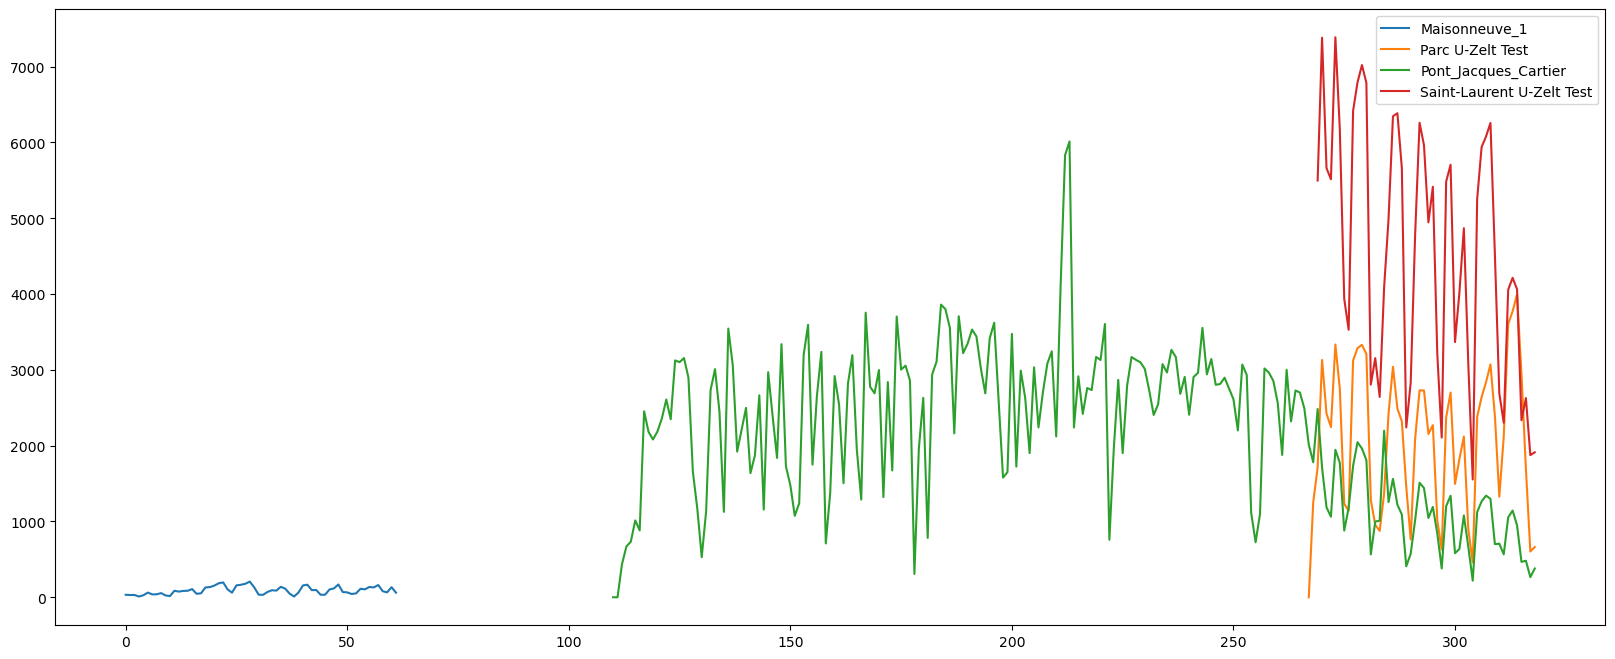

In [692]:
montrealBikeLane[['Maisonneuve_1','Parc U-Zelt Test','Pont_Jacques_Cartier','Saint-Laurent U-Zelt Test']].plot(figsize=(20,8))

Based on the graph, There are 4 lanes which are operated for certain period of time in a year. Will not be considering these lines.

In [693]:
columns_to_remove = ['Maisonneuve_1','Parc U-Zelt Test', 'Pont_Jacques_Cartier', 'Saint-Laurent U-Zelt Test']
montrealBikeLane.drop(columns_to_remove, inplace=True, axis=1)

In [694]:
print(montrealBikeLane.columns.tolist())

['date_time', 'Time', 'Berri1', 'Boyer', 'Brébeuf', 'CSC (Côte Sainte-Catherine)', 'Maisonneuve_2', 'Maisonneuve_3', 'Notre-Dame', 'Parc', 'PierDup', 'Rachel / Hôtel de Ville', 'Rachel / Papineau', 'René-Lévesque', 'Saint-Antoine', 'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger']


In [695]:
print(weatherInfo.columns.tolist())

['date_time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag']


<Axes: >

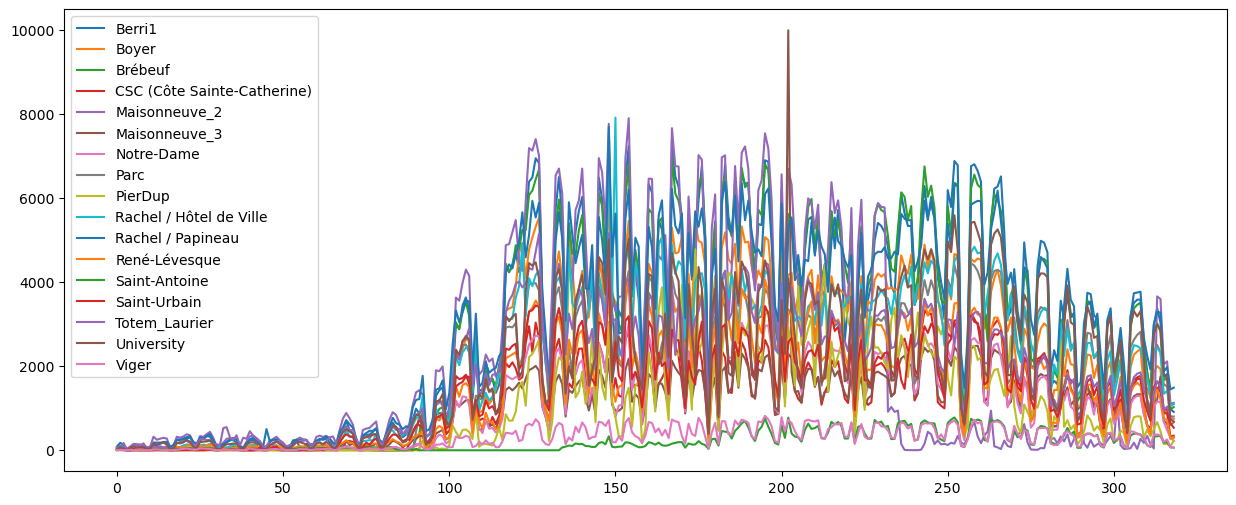

In [696]:
montrealBikeLane.plot(figsize=(15,6))

In [697]:
montrealBikeLane['date_time'] = pd.to_datetime(montrealBikeLane['date_time'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')
weatherInfo['date_time'] = pd.to_datetime(weatherInfo['date_time'], format='%Y/%m/%d').dt.strftime('%d-%m-%Y')

In [698]:
columns_to_remove1 = ['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag', 'Year', 'Day','Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Snow Flag','Total Precip Flag','Dir of Max Gust (10s deg)','Snow on Grnd (cm)','Total Precip (mm)', 'Data Quality']

In [699]:
weatherInfo.drop(columns_to_remove1, inplace=True, axis=1)

finding out the null values in weather data

In [700]:
weatherInfo.rename(columns = {'Mean Temp (°C)':'MeanTemp'}, inplace = True)
weatherInfo.rename(columns = {'Total Rain (mm)':'Rain'}, inplace = True)
weatherInfo.rename(columns = {'Total Snow (cm)':'Snow'}, inplace = True)
weatherInfo.rename(columns = {'Spd of Max Gust (km/h)':'SpeedOfMaxGust'}, inplace = True)
weatherInfo.rename(columns = {'Max Temp (°C)':'MaxTemp'}, inplace = True)
weatherInfo.rename(columns = {'Min Temp (°C)':'MinTemp'}, inplace = True)

In [708]:
print(weatherInfo.columns.tolist())

['date_time', 'Month', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Rain', 'Snow', 'SpeedOfMaxGust']


In [701]:
print(weatherInfo.isnull().sum())

date_time          0
Month              0
MaxTemp            0
MinTemp            0
MeanTemp           0
Rain              13
Snow               4
SpeedOfMaxGust     1
dtype: int64


Handking null values, let's have a look at rain data

In [702]:
rain = weatherInfo.drop(['Snow', 'SpeedOfMaxGust'],1)

/var/folders/56/xltdb4s57l17x65520mknxcr0000gn/T/ipykernel_76466/2665152374.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rain = weatherInfo.drop(['Snow', 'SpeedOfMaxGust'],1)


In [703]:
nullRain = weatherInfo[rain.isnull().any(axis=1)]
print(nullRain)

      date_time  Month  MaxTemp  MinTemp  MeanTemp  Rain  Snow SpeedOfMaxGust
26   27-01-2015      1     -9.6    -16.2     -12.9   NaN   NaN            <31
34   04-02-2015      2     -3.7     -9.5      -6.6   NaN   7.0            <31
52   22-02-2015      2     -3.6    -11.6      -7.6   NaN   1.2             50
80   22-03-2015      3     -8.9    -15.4     -12.2   NaN   NaN            <31
131  12-05-2015      5     23.3      8.4      15.9   NaN   0.0             80
180  30-06-2015      6     25.3     13.7      19.5   NaN   0.0             39
219  08-08-2015      8     23.6     12.7      18.2   NaN   NaN            NaN
224  13-08-2015      8     23.1     16.3      19.7   NaN   0.0             33
280  08-10-2015     10     12.1      3.9       8.0   NaN   0.0            <31
283  11-10-2015     10     17.9      7.6      12.8   NaN   0.0             48
316  13-11-2015     11      9.4      0.9       5.2   NaN   0.0             48
340  07-12-2015     12      4.1     -2.0       1.1   NaN   NaN  

The quantity of rain depends on temperature, we replace the rain value with mean total rain per month.  

In [704]:
weatherInfo['Rain'].fillna(weatherInfo.groupby("Month")["Rain"].transform("mean"), inplace=True)

In [705]:
snow = weatherInfo.drop(['Rain', 'SpeedOfMaxGust'],1)
nullSnow = weatherInfo[snow.isnull().any(axis=1)]
print(nullSnow)

      date_time  Month  MaxTemp  MinTemp  MeanTemp      Rain  Snow  \
26   27-01-2015      1     -9.6    -16.2     -12.9  0.893333   NaN   
80   22-03-2015      3     -8.9    -15.4     -12.2  0.146667   NaN   
219  08-08-2015      8     23.6     12.7      18.2  3.875862   NaN   
340  07-12-2015     12      4.1     -2.0       1.1  2.544828   NaN   

    SpeedOfMaxGust  
26             <31  
80             <31  
219            NaN  
340            <31  


/var/folders/56/xltdb4s57l17x65520mknxcr0000gn/T/ipykernel_76466/897289425.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  snow = weatherInfo.drop(['Rain', 'SpeedOfMaxGust'],1)


Similarly, the snow also depends on current month

In [706]:
weatherInfo['Snow'].fillna(weatherInfo.groupby("Month")["Snow"].transform("mean"), inplace=True)

In [707]:
montrealBikeLane.fillna(0, inplace=True)
output1 = pd.merge(montrealBikeLane, weatherInfo, on='date_time', how='inner')

removing the < char and filling the null with lowest value i.e 31.

In [666]:
weatherInfo.fillna(31, inplace=True)

In [667]:

weatherInfo["SpeedOfMaxGust"]=weatherInfo["SpeedOfMaxGust"].apply(change)

In [669]:
print(output1.columns.tolist())

['date_time', 'Time', 'Berri1', 'Boyer', 'Brébeuf', 'CSC (Côte Sainte-Catherine)', 'Maisonneuve_2', 'Maisonneuve_3', 'Notre-Dame', 'Parc', 'PierDup', 'Rachel / Hôtel de Ville', 'Rachel / Papineau', 'René-Lévesque', 'Saint-Antoine', 'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger', 'Month', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Rain', 'Snow', 'SpeedOfMaxGust']


In [672]:
output1.to_csv('filled_dataset.csv', index=False)

calculating the total sum of all the lines and considering it as target value.

In [674]:
val=[]
for i in range(len(output1)):
    val.append(output1.iloc[i,2:23].values.sum())

In [675]:
output1["Total"]=val

In [676]:
X=output1.drop("Total",axis=1)
y=output1["Total"]

plotting the corellation matrix

<Axes: >

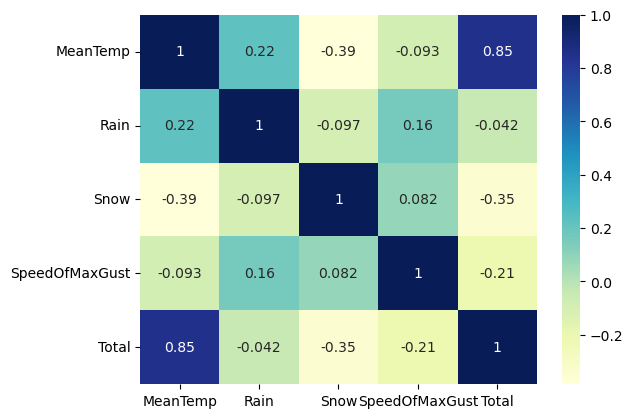

In [678]:
sns.heatmap(output1[['MeanTemp','Rain','Snow','SpeedOfMaxGust','Total']].corr(),annot=True, cmap="YlGnBu")

In [709]:
print(output1.columns.tolist())

['date_time', 'Time', 'Berri1', 'Boyer', 'Brébeuf', 'CSC (Côte Sainte-Catherine)', 'Maisonneuve_2', 'Maisonneuve_3', 'Notre-Dame', 'Parc', 'PierDup', 'Rachel / Hôtel de Ville', 'Rachel / Papineau', 'René-Lévesque', 'Saint-Antoine', 'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger', 'Month', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Rain', 'Snow', 'SpeedOfMaxGust']


The total number of cyles are highly corrilated with temperature.

Spliting the data into training data and testing data.

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

we are using the gplearn SymbolicRegressor model to tarin our pre processed data.

In [679]:
est_gp = SymbolicRegressor(population_size=100, generations=20, tournament_size=20, random_state=42)
est_gp.fit(X_train, y_train)

SymbolicRegressor(population_size=100, random_state=42)

In [680]:
est_gp.score(X_test,y_test)

0.9724338249078033

In [681]:
pred=est_gp.predict(X_test)

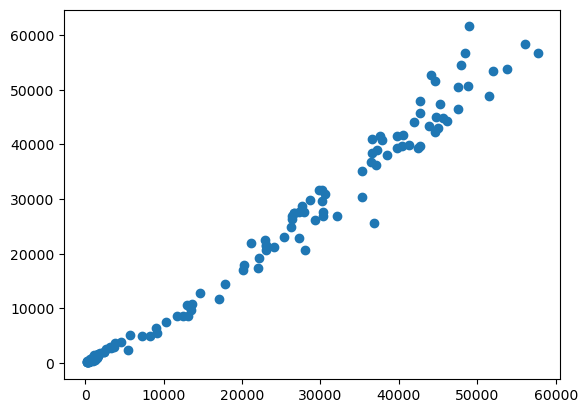

In [682]:
plt.scatter(y_test,pred)

In [683]:
y_pred_train = est_gp.predict(X_train)
y_pred_test = est_gp.predict(X_test)

In [684]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [685]:
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 12366813.823831463
Test MSE: 8668501.610805102


In [686]:
print("Best equation:", est_gp._program)

Best equation: add(sub(div(mul(add(X5, X15), sub(-0.670, X11)), sub(X22, add(X23, X16))), sub(sub(-0.670, X11), add(X4, X0))), add(X5, X15))
